# **Project Name**    - Retail Sales Prediction

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind,ttest_1samp,t,norm
import eda
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6716\4014220726.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# Load Dataset
path = 'data/store.csv'
df = pd.read_csv(path)

### Dataset First View

In [3]:
# First look
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count, column, duplicate count, missing/nan count, unique count.

In [4]:
# Dataset Rows & Columns count etc
eda.showSCDMU(df)

 Rows and columns count for rossmann_df : (1115, 10)

columns :  ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

duplicates counts : 0

Nan\missing count :
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Unique Count :
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int

In [5]:
print('Percentage of null in each column :')
null_df = round(df.isna().sum()/len(df),2).reset_index(name='null %') # calculate null and store in new variable
df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
         'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1, inplace=True) # drop columns with more than 30% null
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].quantile(.5)) # Fill null with median
null_df

Percentage of null in each column :


,index,null %
0,Store,0.00
1,StoreType,0.00
2,Assortment,0.00
3,CompetitionDistance,0.00
4,CompetitionOpenSinceMonth,0.32
5,CompetitionOpenSinceYear,0.32
6,Promo2,0.00
7,Promo2SinceWeek,0.49
8,Promo2SinceYear,0.49
9,PromoInterval,0.49


Column with more than 30% null values going to be dropped because we already lost lots of informations.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1115 non-null   float64
 4   Promo2               1115 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.7+ KB


### What did you know about your dataset?

1. The dataset had 1115 rows and 10 columns. There were 5 columns with more than 30% null values therefore i decided to drop them.
2. No duplicate rows found.

## ***2. Understanding Your Variables***

In [7]:
# Dataset Describe
df.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1115.000000,1115.000000
mean,558.00000,5396.614350,0.512108
std,322.01708,7654.513635,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,720.000000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6875.000000,1.000000
max,1115.00000,75860.000000,1.000000


### Variables Description 

1. CompetitionDistance has mean 5404 and median 2325. This indicates presence of outliers.

### Check Unique Values for each variable.

In [8]:
for col in df.columns:
    print('Unique values in the column : ', col)
    print(df[col].unique())
    print()

Unique values in the column :  Store
[   1    2    3 ... 1113 1114 1115]

Unique values in the column :  StoreType
['c' 'a' 'd' 'b']

Unique values in the column :  Assortment
['a' 'c' 'b']

Unique values in the column :  CompetitionDistance
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+

## 3. ***Data Wrangling***

### Data Wrangling Code

In [9]:
countOfStoresTypewise = df['StoreType'].value_counts()
countOfStoresAssortmentwise = df['Assortment'].value_counts()
countOfStoresPromo2wise = df['Promo2'].value_counts()
print('Number of stores typewise :')
print(countOfStoresTypewise)
print()
print('Number of stores assortmentwise :')
print(countOfStoresAssortmentwise)
print()
print('Number of stores promo2wise :')
print(countOfStoresPromo2wise)
print()

Number of stores typewise :
StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

Number of stores assortmentwise :
Assortment
a    593
c    513
b      9
Name: count, dtype: int64

Number of stores promo2wise :
Promo2
1    571
0    544
Name: count, dtype: int64



### What all manipulations have you done and insights you found?

There are class imbalance in StoreType and Assortment it can cause biasness in model.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Histplot of CompetitionDistance

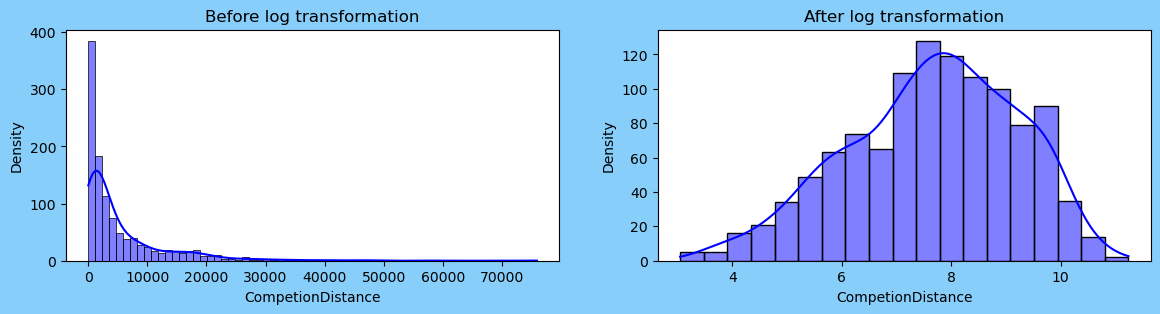

In [10]:
# Chart 1
facecolor = 'lightskyblue'
fig, ax = plt.subplots(nrows=1, ncols=2, facecolor=facecolor, figsize=(14,3))
sns.histplot(df['CompetitionDistance'], color='blue', kde=True, ax=ax[0])
sns.histplot(np.log(df['CompetitionDistance']+1), color='blue', kde=True, ax=ax[1])
ax[0].set_xlabel('CompetionDistance')
ax[1].set_xlabel('CompetionDistance')
ax[0].set_ylabel('Density')
ax[1].set_ylabel('Density')
ax[0].set_title('Before log transformation')
ax[1].set_title('After log transformation')
plt.show()
df['CompetitionDistance'] = np.log(df['CompetitionDistance']+1) # Log transformation of CompetitionDistance

1. Distribution charts shows how data is distributed on the axis. I picked this chart to check the distribution of CompetitionDistance.
2. From the above chart I found that the data is rightly skewed.
3. A righly skewed data is not good for  model building but after log transformation data is normally distributed.

#### Chart - 2 - Pie chart groupby day of week and sales.

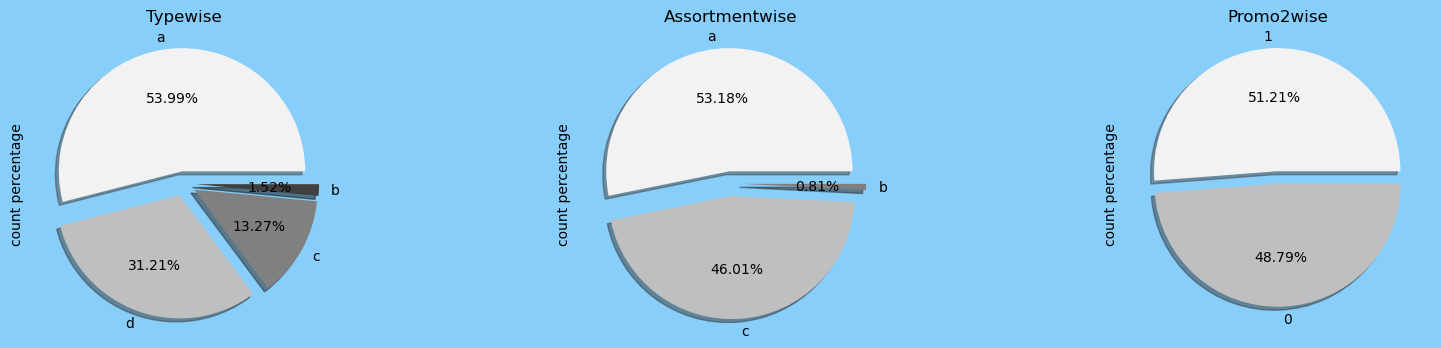

In [11]:
# Chart - 2 visualization code
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 4), facecolor=facecolor)
countOfStoresTypewise.plot.pie(ax=ax[0], explode=[.1,.1,.1,.1], autopct='%.2f%%', shadow=True, colors=['#f2f2f2','#bfbfbf', '#808080', '#404040'])
countOfStoresAssortmentwise.plot.pie(ax=ax[1], explode=[.1,.1,.1], autopct='%.2f%%', shadow=True, colors=['#f2f2f2','#bfbfbf', '#808080', '#404040'])
countOfStoresPromo2wise.plot.pie(ax=ax[2], explode=[.1,0], autopct='%.2f%%', shadow=True, colors=['#f2f2f2','#bfbfbf', '#808080', '#404040'])
ax[0].set_ylabel('count percentage')
ax[1].set_ylabel('count percentage')
ax[2].set_ylabel('count percentage')

ax[0].set_title('Typewise')
ax[1].set_title('Assortmentwise')
ax[2].set_title('Promo2wise')
plt.show()

1. Pie chart shows part to whole relationship in the data. I picked this chart to see percentage of data count in each categories.
2. I found that in typewise visualization type a contains more than 50% stores alone.
3. In assortmentwise a contains more than 50% stores alone, then c contains 46% and b only 1%.
4. In promo2wise both categories contains almost equal stores.

In [12]:
df.to_csv('cleaned_data/store_eda_done.csv')